<a href="https://colab.research.google.com/github/deondmello16/deepFake/blob/main/DeepFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!pip install mtcnn
from mtcnn import MTCNN
import threading as thr
 
#!cd /kaggle/working/
!mkdir frames_1
!mkdir frames_2
!mkdir frames_3
!mkdir frames_4
!mkdir results_1
!mkdir results_2
!mkdir presidents

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.7 MB/s eta 0:00:00


In [ ]:
input_1 = 'presidents/trump1.mp4'
input_2 = 'presidents/trump2.mp4'
input_3 = 'presidents/biden1.mp4'
input_4 = 'presidents/biden2.mp4'
output_1 = 'frames_1/'
output_2 = 'frames_2/'
output_3 = 'frames_3/'
output_4 = 'frames_4/'

In [ ]:
def extract_frames(input_path,output_path):
    videocapture = cv2.VideoCapture(input_path)
    success,image = videocapture.read()
    count = 0
    while success:
        cv2.imwrite(output_path+"frame%d.jpg" % count, image)     
        success,image = videocapture.read()
        count += 1
    return count

In [ ]:
total_frames_1 = extract_frames(input_1,output_1)
total_frames_2 = extract_frames(input_2,output_2)
total_frames_3 = extract_frames(input_3,output_3)
total_frames_4 = extract_frames(input_4,output_4)

In [ ]:
print('Total frames extracted in video 1: ',total_frames_1)
print('Total frames extracted in video 2: ',total_frames_2)
print('Total frames extracted in video 3: ',total_frames_3)
print('Total frames extracted in video 4: ',total_frames_4)

Total frames extracted in video 1:  1701
Total frames extracted in video 2:  1875
Total frames extracted in video 3:  1109
Total frames extracted in video 4:  1530


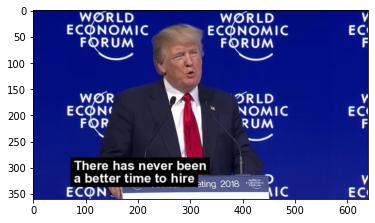

In [ ]:
%matplotlib inline
plt.figure()
image = cv2.imread('frames_1/frame1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype('float32')
image /= 255.0
plt.imshow(image)
plt.show()

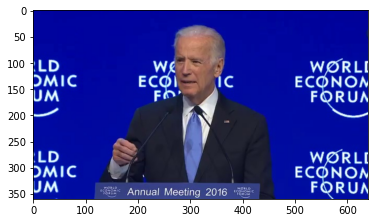

In [ ]:
%matplotlib inline
plt.figure()
image = cv2.imread('frames_3/frame1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
def extract_faces(source_1,source_2,destination,detector):
    global counter
    counter = 0
    def src1(source_1,destination,detector):
      counter = 0
      for dirname, _, filenames in os.walk(source_1):
          for filename in filenames:
              try:
                  image = cv2.imread(os.path.join(dirname, filename))
                  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                  detections = detector.detect_faces(image)
                  x, y, width, height = detections[0]['box']
                  x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
                  face = image[y1:y2, x1:x2]
                  face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                  plt.imsave(os.path.join(destination,str(counter)+'.jpg'),face)
                  print('Saved: ',os.path.join(destination,str(counter)+'.jpg'))
              except:
                  pass
              counter += 2
    def src2(source_2,destination,detector):
      counter = 0
      for dirname, _, filenames in os.walk(source_2):
          for filename in filenames:
              try:
                  image = cv2.imread(os.path.join(dirname, filename))
                  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                  detections = detector.detect_faces(image)
                  x, y, width, height = detections[0]['box']
                  x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
                  face = image[y1:y2, x1:x2]
                  face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                  plt.imsave(os.path.join(destination,str(counter)+'.jpg'),face)
                  print('Saved: ',os.path.join(destination,str(counter)+'.jpg'))
              except:
                  pass
              counter += 1
    t1 = thr.Thread(target=src1,args=(source_1,destination,detector))
    t2 = thr.Thread(target=src2,args=(source_2,destination,detector))

    t1.start()
    t2.start()

    t1.join()
    t2.join()

detector = MTCNN()
t1 = thr.Thread(target=extract_faces,args=('frames_1/','frames_2/', 'results_1/',detector))
t2 = thr.Thread(target=extract_faces,args=('frames_3/','frames_4/', 'results_2/',detector))

t1.start()
t2.start()

t1.join()
t2.join()

# extract_faces('frames_1/','frames_2/', 'results_1/',detector)
# extract_faces('frames_3/','frames_4/', 'results_2/',detector)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 38ms/step
Saved:  results_1/1581.jpg
1/1 [==============================] - 0s 54ms/step
Saved:  results_1/3154.jpg
1/1 [==============================] - 0s 60ms/step
Saved:  results_1/1582.jpg
1/1 [==============================] - 0s 46ms/step
Saved:  results_1/3156.jpg
1/1 [==============================] - 0s 66ms/step
Saved:  results_1/1583.jpg
1/1 [==============================] - 0s 47ms/step
Saved:  results_1/3158.jpg
1/1 [==============================] - 0s 59ms/step
Saved:  results_1/1584.jpg
1/1 [==============================] - 0s 54ms/step
Saved:  results_1/3160.jpg
1/1 [==============================] - 0s 63ms/step
Saved:  results_1/1585.jpg
1/1 [==============================] - 0s 63ms/step
Saved:  results_1/3162.jpg
1/1 [==============================] - 0s 63ms/step
Saved:  results_1/1586.jpg
1/1 [==============================] - 0s 69ms/step
Saved:  results_1/3164.jpg
1

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
def create_dataset(path):
    images = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            image = cv2.imread(os.path.join(dirname, filename))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = image.astype('float32')
            image /= 255.0
            images.append(image)
    images = np.array(images)
    return images

In [ ]:
faces_1 = create_dataset('results_1/')
faces_2 = create_dataset('results_2/')

In [ ]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(faces_1, faces_1, test_size=0.20, random_state=0)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(faces_2, faces_2, test_size=0.15, random_state=0)

In [ ]:
input_img = layers.Input(shape=(120, 120, 3))
x = layers.Conv2D(256,kernel_size=5, strides=2, padding='same',activation='relu')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(512,kernel_size=5, strides=2, padding='same',activation='relu')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(1024,kernel_size=5, strides=2, padding='same',activation='relu')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(9216)(x)
encoded = layers.Reshape((3,3,1024))(x)
encoder = keras.Model(input_img, encoded,name="encoder")

In [ ]:
decoder_input= layers.Input(shape=((3,3,1024)))
x = layers.Conv2D(1024,kernel_size=5, strides=2, padding='same',activation='relu')(decoder_input)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(512,kernel_size=5, strides=2, padding='same',activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(256,kernel_size=5, strides=2, padding='same',activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(np.prod((120, 120, 3)))(x)
decoded = layers.Reshape((120, 120, 3))(x)
decoder = keras.Model(decoder_input, decoded,name="decoder")

In [ ]:
auto_input = layers.Input(shape=(120,120,3))
encoded = encoder(auto_input)
decoded = decoder(encoded)
 
autoencoder = keras.Model(auto_input, decoded,name="autoencoder")
autoencoder.compile(optimizer=keras.optimizers.Adam(lr=5e-5, beta_1=0.5, beta_2=0.999), loss='mae')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 encoder (Functional)        (None, 3, 3, 1024)        54162944  
                                                                 
 decoder (Functional)        (None, 120, 120, 3)       86880192  
                                                                 
Total params: 141,043,136
Trainable params: 141,043,136
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpoint1 = ModelCheckpoint("autoencoder_a.hdf5", monitor='val_loss', verbose=1,save_best_only=True, mode='auto', period=1)
history1 = autoencoder.fit(X_train_a, X_train_a, epochs=200, batch_size=512, shuffle=True, validation_data=(X_test_a, X_test_a), callbacks=[checkpoint1])

Epoch 1/200
5/5 [==============================] - ETA: 0s - loss: 0.0656
Epoch 1: val_loss improved from inf to 0.06163, saving model to autoencoder_a.hdf5
5/5 [==============================] - 16s 4s/step - loss: 0.0656 - val_loss: 0.0616
Epoch 2/200
5/5 [==============================] - ETA: 0s - loss: 0.0799
Epoch 2: val_loss did not improve from 0.06163
5/5 [==============================] - 7s 1s/step - loss: 0.0799 - val_loss: 0.0909
Epoch 3/200
5/5 [==============================] - ETA: 0s - loss: 0.0744
Epoch 3: val_loss did not improve from 0.06163
5/5 [==============================] - 8s 1s/step - loss: 0.0744 - val_loss: 0.1000
Epoch 4/200
5/5 [==============================] - ETA: 0s - loss: 0.0820
Epoch 4: val_loss improved from 0.06163 to 0.04843, saving model to autoencoder_a.hdf5
5/5 [==============================] - 17s 4s/step - loss: 0.0820 - val_loss: 0.0484
Epoch 5/200
5/5 [==============================] - ETA: 0s - loss: 0.0680
Epoch 5: val_loss did not im

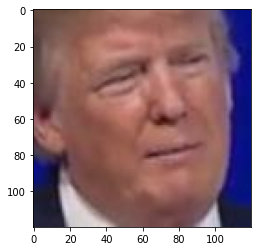

In [ ]:
%matplotlib inline
plt.figure()
plt.imshow(X_test_a[30])
plt.show()

1/1 [==============================] - 1s 664ms/step


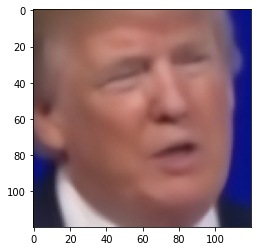

In [ ]:
autoencoder_a = load_model("autoencoder_a.hdf5")
output_image = autoencoder_a.predict(np.array([X_test_a[30]]))
plt.figure()
plt.imshow(output_image[0])
plt.show()

In [ ]:
checkpoint2 = ModelCheckpoint("autoencoder_b.hdf5", monitor='val_loss', verbose=1,save_best_only=True, mode='auto', period=1)
history2 = autoencoder.fit(X_train_b, X_train_b,epochs=200,batch_size=512,shuffle=True,validation_data=(X_test_b, X_test_b),callbacks=[checkpoint2])

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 0.1030
Epoch 1: val_loss improved from inf to 0.08598, saving model to autoencoder_b.hdf5
4/4 [==============================] - 20s 6s/step - loss: 0.1030 - val_loss: 0.0860
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 0.0833
Epoch 2: val_loss improved from 0.08598 to 0.07929, saving model to autoencoder_b.hdf5
4/4 [==============================] - 15s 4s/step - loss: 0.0833 - val_loss: 0.0793
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 0.0775
Epoch 3: val_loss improved from 0.07929 to 0.07598, saving model to autoencoder_b.hdf5
4/4 [==============================] - 14s 4s/step - loss: 0.0775 - val_loss: 0.0760
Epoch 4/200
4/4 [==============================] - ETA: 0s - loss: 0.0744
Epoch 4: val_loss improved from 0.07598 to 0.07469, saving model to autoencoder_b.hdf5
4/4 [==============================] - 15s 5s/step - loss: 0.0744 - val_loss: 0.0747
Epoch 5/200
4/4 [===

In [ ]:
keras.backend.clear_session()

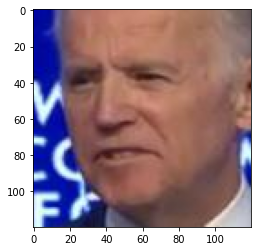

In [ ]:
plt.figure()
plt.imshow(X_test_b[0])
plt.show()

1/1 [==============================] - 0s 184ms/step


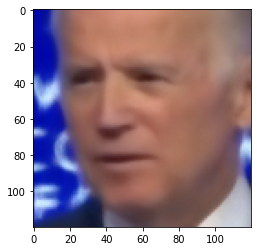

In [ ]:
autoencoder_b = load_model("autoencoder_b.hdf5")
output_image = autoencoder_b.predict(np.array([X_test_b[0]]))
plt.figure()
plt.imshow(output_image[0])
plt.show()

In [ ]:
# TO LOAD ONLY THE ENCODER A
encoder_a = keras.Model(autoencoder_a.layers[1].input, autoencoder_a.layers[1].output)
# TO LOAD ONLY THE DECODER A
decoder_a = keras.Model(autoencoder_a.layers[2].input, autoencoder_a.layers[2].output)
# TO LOAD ONLY THE ENCODER B
encoder_b = keras.Model(autoencoder_b.layers[1].input, autoencoder_b.layers[1].output)
# TO LOAD ONLY THE DECODER B
decoder_b = keras.Model(autoencoder_b.layers[2].input, autoencoder_b.layers[2].output)
 
# TO TRANSFORM SRC IMAGES
input_test = encoder_a.predict(np.array([X_test_a[30]]))
output_test = decoder_b.predict(input_test)
 
# TO TRANSFORM DST IMAGES
input_test = encoder_b.predict(np.array([X_test_b[30]]))
output_test = decoder_a.predict(input_test)

1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 69ms/step


In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow
from tensorflow.keras.models import load_model
import gc
import matplotlib.pyplot as plt
import cv2
import os
import dlib
from IPython.display import clear_output

In [ ]:
# !cd /kaggle/working/
!mkdir frames
!mkdir results
!mkdir transformed
!mkdir final
!ls 

autoencoder_a.hdf5  frames    frames_3	  results    sample_data
autoencoder_b.hdf5  frames_1  frames_4	  results_1  transformed
final		    frames_2  presidents  results_2


In [ ]:
input_path = 'presidents/trump1.mp4'
output_path = 'frames/'
 
def extract_frames(input_path,output_path):
    videocapture = cv2.VideoCapture(input_path)
    success,image = videocapture.read()
    count = 0
    while success:
        cv2.imwrite(output_path+"%d.jpg" % count, image)     
        success,image = videocapture.read()
        count += 1
    print('Frames extraction has ended')
    return count
 
frames = extract_frames(input_path,output_path)

Frames extraction has ended


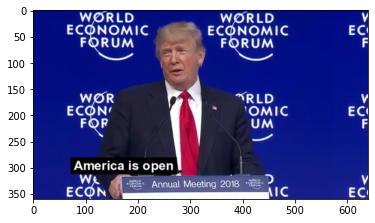

In [ ]:
%matplotlib inline
plt.figure()
image = cv2.imread('frames/120.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
!pip install mtcnn
from mtcnn import MTCNN
detector = MTCNN()
def extract_faces(source,destination,detector):
    counter = 0
    for dirname, _, filenames in os.walk(source):
        for filename in filenames:
            try:
                image = cv2.imread(os.path.join(dirname, filename))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                detections = detector.detect_faces(image)
                x, y, width, height = detections[0]['box']
                x1,y1,x2,y2 = x-10,y+10,x-10 +width + 20,y+10+height
                face = image[y1:y2, x1:x2]
                face = cv2.resize(face, (120, 120), interpolation=cv2.INTER_LINEAR)
                plt.imsave(os.path.join(destination,filename),face)
                clear_output(wait=True)
                print("Extraction progress: "+str(counter)+"/"+str(len(filenames)-1))
            except:
                pass
            counter += 1
extract_faces('frames/','results/',detector)

Extraction progress: 1700/1700


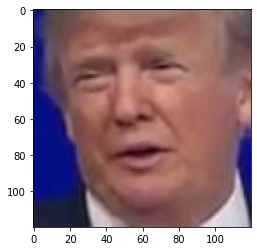

In [ ]:
%matplotlib inline
plt.figure()
image = cv2.imread('results/120.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
autoencoder_a = load_model("autoencoder_a.hdf5")
autoencoder_b = load_model("autoencoder_b.hdf5")

In [ ]:
# LOADING THE ENCODER A
encoder_a = keras.Model(autoencoder_a.layers[1].input, autoencoder_a.layers[1].output)
# LOADING THE DECODER B
decoder_b = keras.Model(autoencoder_b.layers[2].input, autoencoder_b.layers[2].output)

In [ ]:
def face_transform(source,destination,encoder,decoder):
    counter = 0
    for dirname, _, filenames in os.walk(source):
        for filename in filenames:
            # load the image
            try:
                image = cv2.imread(os.path.join(source, filename))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = image.astype('float32')
                image /= 255.0
                image = encoder.predict(np.array([image]))
                image = decoder.predict(image)
                image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
                image = image.astype(np.uint8)
                plt.imsave(os.path.join(destination,filename),image[0])
                counter += 1
                clear_output(wait=True)
                print("Transformation progress: "+str(counter)+"/"+str(len(filenames)))
            except:
                print('exception')
                Pass

In [ ]:
face_transform('results/','transformed',encoder_a,decoder_b)

Transformation progress: 1701/1701


In [ ]:
!git clone https://github.com/matthewearl/faceswap.git

Cloning into 'faceswap'...
remote: Enumerating objects: 32, done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 32
Unpacking objects: 100% (32/32), 7.98 KiB | 817.00 KiB/s, done.


In [ ]:
pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load ./faceswap/faceswap.py